In [6]:
import openml
from gplearn.genetic import SymbolicTransformer, SymbolicRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
dataset = openml.datasets.get_dataset(542)

X, y, _, _ = dataset.get_data(dataset_format="dataframe", target=dataset.default_target_attribute)

X.head()

,PREC,JANT,JULT,OVR65,POPN,EDUC,HOUS,DENS,NONW,WWDRK,POOR,HC,NOX,SO2,HUMID
0,36,27,71,8.1,3.34,11.4,81.5,3243,8.8,42.6,11.7,21,15,59,59
1,35,23,72,11.1,3.14,11.0,78.8,4281,3.5,50.7,14.4,8,10,39,57
2,44,29,74,10.4,3.21,9.8,81.6,4260,0.8,39.4,12.4,6,6,33,54
3,47,45,79,6.5,3.41,11.1,77.5,3125,27.1,50.2,20.6,18,8,24,56
4,43,35,77,7.6,3.44,9.6,84.6,6441,24.4,43.7,14.3,43,38,206,55


In [8]:
y.head()

0     921.870
1     997.875
2     962.354
3     982.291
4    1071.289
Name: MORT, dtype: float64

In [9]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min']
transformer = SymbolicTransformer(generations=20,
                                  population_size=6000,
                                  hall_of_fame=100,
                                  n_components=8,
                                  function_set=function_set,
                                  parsimony_coefficient=0.0001,
                                  max_samples=0.3,
                                  verbose=1,
                                  random_state=42,
                                  n_jobs=-1)

transformer.fit(X, y)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    11.15         0.334587        6         0.899489         0.399366     31.33s
   1    11.51         0.438674       12         0.934296         0.406313     37.23s
   2    13.09         0.507633       38         0.910603         0.622141     44.74s
   3    15.68         0.538913       14           0.9251         0.703726     47.41s
   4    19.80         0.564239       44          0.93086         0.705602     52.49s
   5    24.98         0.588319       12         0.968861         0.687333     49.47s
   6    28.82         0.616736       30         0.955705          0.69058     54.32s
   7    31.78         0.644471       15          0.95666         0.776002     44.74s
   8    36.63         0.677724       20         0.956676         0.755125  

SymbolicTransformer(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                  'abs', 'neg', 'inv', 'max', 'min'],
                    max_samples=0.3, n_components=8, n_jobs=-1,
                    parsimony_coefficient=0.0001, population_size=6000,
                    random_state=42, verbose=1)

In [10]:
X_transformed = transformer.transform(X)
X = np.hstack((X, X_transformed))
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,36.0,27.0,71.0,8.1,3.34,11.4,81.5,3243.0,8.8,42.6,...,59.0,59.0,215.196402,255.672988,-5.636008,73.485264,225.082410,2.983564,55.332543,-0.511337
1,35.0,23.0,72.0,11.1,3.14,11.0,78.8,4281.0,3.5,50.7,...,39.0,57.0,160.787431,197.694057,-6.298233,60.924141,172.071362,2.751195,49.054276,-1.167706
2,44.0,29.0,74.0,10.4,3.21,9.8,81.6,4260.0,0.8,39.4,...,33.0,54.0,135.903516,166.530523,-7.064059,60.483121,185.982217,2.689744,55.843276,-1.437622
3,47.0,45.0,79.0,6.5,3.41,11.1,77.5,3125.0,27.1,50.2,...,24.0,56.0,293.775146,337.354132,-4.484122,105.538532,304.446615,3.312058,70.373872,0.598970
4,43.0,35.0,77.0,7.6,3.44,9.6,84.6,6441.0,24.4,43.7,...,206.0,55.0,343.825660,407.949505,-2.637559,108.000390,366.465750,3.642462,80.560978,2.899371


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min']
est_gp = SymbolicRegressor(
    population_size=5000,
    generations=20,
    p_crossover=0.6,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.2,
    p_point_mutation=0.1,
    max_samples=0.5,
    function_set=function_set,
    verbose=1,
    tournament_size=20,
    parsimony_coefficient=0.001,
    stopping_criteria=0.01,
    metric='mse',
    n_jobs=-1,
    random_state=42
)

est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    10.58      3.64802e+14        3          10074.6          10864.4      7.41s
   1    10.67      4.84505e+13        3          6884.19          14054.8     32.08s
   2    12.50      4.08365e+13        3           3344.7          17594.3     51.57s
   3    10.96       2.5969e+10        3          3508.59          17430.4     36.59s
   4     6.12      1.70891e+18        3          3384.83          17554.2     36.08s
   5     7.67      4.06672e+10        5          2951.45          17835.4     31.03s
   6    11.10       2.0123e+11       11          3092.47          16022.7     28.58s
   7    16.33      2.86879e+11       20          2224.67          7130.16     38.79s
   8    19.57      4.18675e+11       22          1954.22          7403.69  

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'abs', 'neg', 'inv', 'max', 'min'],
                  max_samples=0.5, metric='mse', n_jobs=-1, p_crossover=0.6,
                  p_hoist_mutation=0.2, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, population_size=5000, random_state=42,
                  stopping_criteria=0.01, verbose=1)

In [13]:
y_pred_train = pd.Series(est_gp.predict(X_train), index=X_train.index)
y_pred_train.head()

40     946.592144
4     1091.704882
43    1025.240208
19     891.354273
34     960.960558
dtype: float64

In [14]:
y_train.head()

40     893.991
4     1071.289
43    1025.502
19     941.181
34     961.009
Name: MORT, dtype: float64

In [15]:
y_pred_test = pd.Series(est_gp.predict(X_test), index=X_test.index)
y_pred_test.head()

0      928.260686
5     1006.919201
36    1057.232521
45     939.598398
13     994.539678
dtype: float64

In [16]:
y_test.head()

0      921.870
5     1030.380
36    1113.156
45     953.560
13     985.950
Name: MORT, dtype: float64

In [17]:
print("R2 Score of train samples whit the model: ", est_gp.score(X_train, y_train))
print("R2 Score of test samples whit the model: ", est_gp.score(X_test, y_test))

R2 Score of train samples whit the model:  0.2682303951076148
R2 Score of test samples whit the model:  -0.2898705028818669


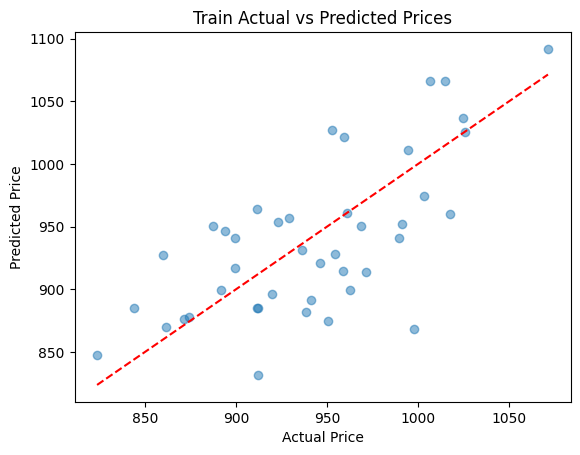

In [18]:
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Train Actual vs Predicted Prices')
plt.show()

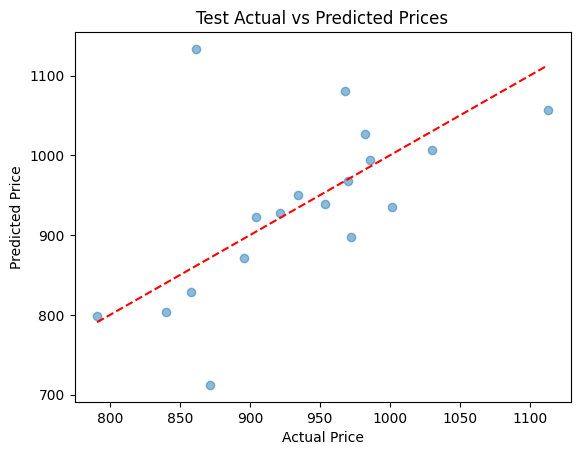

In [19]:
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Test Actual vs Predicted Prices')
plt.show()

In [ ]:
X, y = load_diabetes(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

r = EvolutionaryForestRegressor(max_height=3, normalize=True, select='AutomaticLexicase',
                                gene_num=10, boost_size=100, n_gen=20, n_pop=200, cross_pb=1,
                                base_learner='Random-DT', verbose=True)

r.fit(x_train, y_train)
print(r2_score(y_test, r.predict(x_test)))